In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


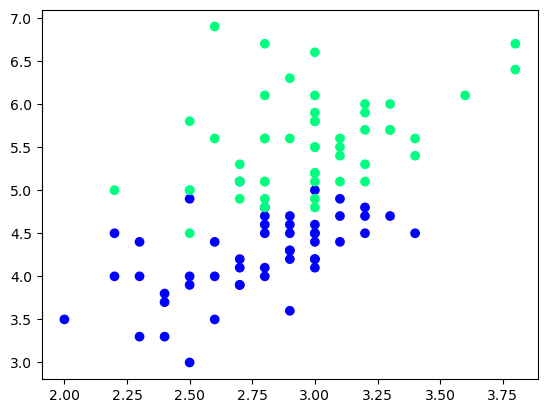

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [8]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
84,3.0,4.5,1
71,2.8,4.0,1
81,2.4,3.7,1
69,2.5,3.9,1
88,3.0,4.1,1
82,2.7,3.9,1
75,3.0,4.4,1
76,2.8,4.8,1
65,3.1,4.4,1
58,2.9,4.6,1


In [9]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)
df_train

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
81,2.4,3.7,1
86,3.1,4.7,1
75,3.0,4.4,1
113,2.5,5.0,2
139,3.1,5.4,2
92,2.6,4.0,1
57,2.4,3.3,1
147,3.0,5.2,2
142,2.7,5.1,2


In [10]:
df_val

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
73,2.8,4.7,1
123,2.7,4.9,2
137,3.1,5.5,2
74,2.9,4.3,1


In [11]:
df_test

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
91,3.0,4.6,1
58,2.9,4.6,1
51,3.2,4.5,1
110,3.2,5.1,2


In [12]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([2, 1, 2, 2, 1])

In [13]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
86,3.1,4.7,1
80,2.4,3.8,1
86,3.1,4.7,1
81,2.4,3.7,1
147,3.0,5.2,2
142,2.7,5.1,2
139,3.1,5.4,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag


,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
113,2.5,5.0,2
92,2.6,4.0,1
57,2.4,3.3,1
80,2.4,3.8,1
92,2.6,4.0,1
86,3.1,4.7,1
81,2.4,3.7,1


In [24]:
dt_bag2 = DecisionTreeClassifier()

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
142,2.7,5.1,2
80,2.4,3.8,1
139,3.1,5.4,2
75,3.0,4.4,1
57,2.4,3.3,1
139,3.1,5.4,2
113,2.5,5.0,2


In [26]:
dt_bag3 = DecisionTreeClassifier()

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

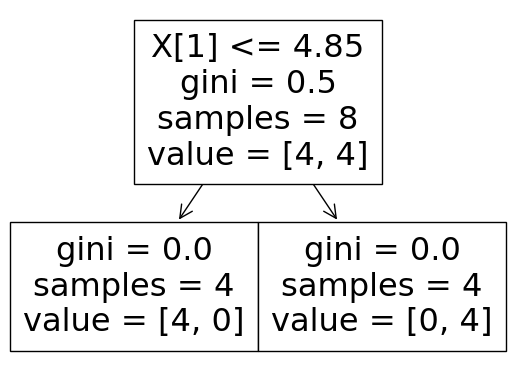

1.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


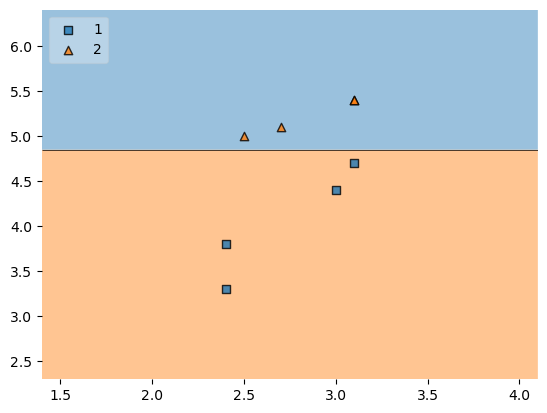

In [28]:
evaluate(dt_bag3,X,y)

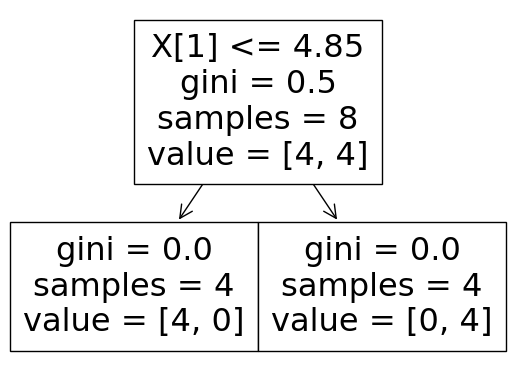

1.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


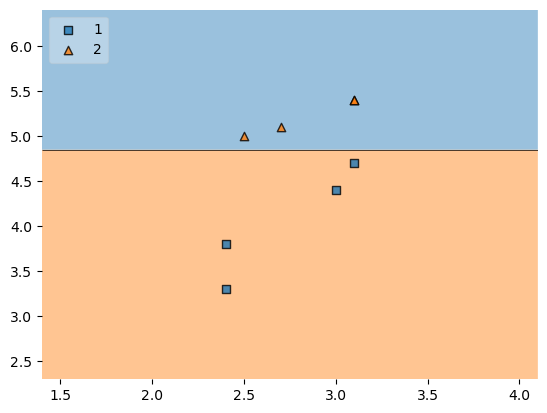

In [29]:
evaluate(dt_bag2,X,y)

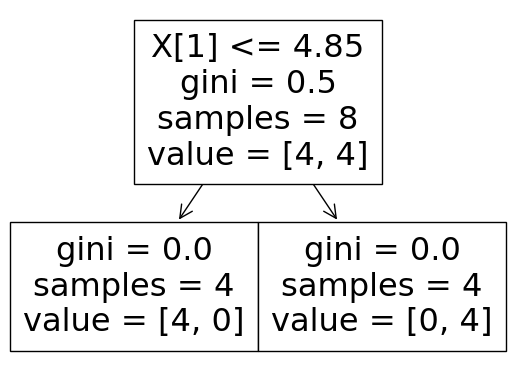

1.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


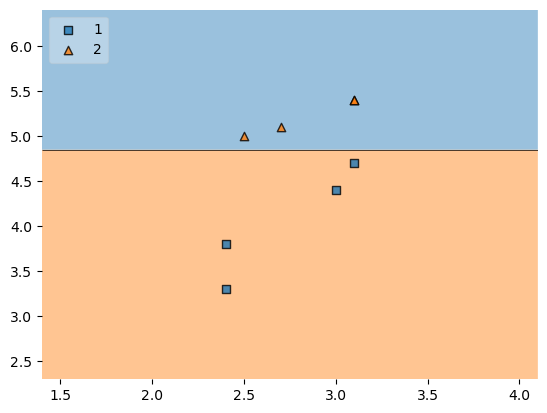

In [30]:
evaluate(dt_bag1,X,y)

In [31]:
df_test

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
91,3.0,4.6,1
58,2.9,4.6,1
51,3.2,4.5,1
110,3.2,5.1,2


In [32]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
81,2.4,3.7,1
86,3.1,4.7,1
75,3.0,4.4,1
113,2.5,5.0,2
139,3.1,5.4,2
92,2.6,4.0,1
57,2.4,3.3,1
147,3.0,5.2,2
142,2.7,5.1,2


In [34]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
81,2.4,3.7,1
80,2.4,3.8,1
113,2.5,5.0,2
139,3.1,5.4,2
57,2.4,3.3,1
147,3.0,5.2,2
92,2.6,4.0,1


In [36]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,7,4.6,3.4,1.4,0.3,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [37]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,PetalLengthCm
6,4.6,1.4
78,6.0,4.5
108,6.7,5.8
79,5.7,3.5
106,4.9,4.5
55,5.7,4.5
140,6.7,5.6
60,5.0,3.5
95,5.7,4.2
130,7.4,6.1


In [38]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,7,4.6,3.4,1.4,0.3,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [39]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,Id
6,0.3,7
78,1.5,79
108,1.8,109
79,1.0,80
106,1.7,107
55,1.3,56
140,2.4,141
60,1.0,61
95,1.2,96
130,1.9,131
